In [1]:
import requests # for making standard html requests
from bs4 import BeautifulSoup # magical tool for parsing html data
import json # for parsing data
import pandas as pd # premier library for data organization

In [2]:
URL = ('http://www.city-data.com/neighborhood/Upper-West-Side-New-York-NY.html')
page = requests.get(URL)
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
page = requests.get(URL)
page.encoding = 'ISO-885901'
soup = BeautifulSoup(page.text, 'html.parser')

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="en" http-equiv="Content-Language"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="index, follow" name="robots"/>
<meta content="all" name="robots"/>
<meta content="all" name="googlebot"/>
<meta msnbot="all" name="msnbot"/>
<meta content="YES" name="apple-mobile-web-app-capable"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link as="font" crossorigin="anonymous" href="//pics3.city-data.com/fonts/glyphicons-halflings-regular.woff2" rel="preload" type="font/woff2"/>
<link as="script" crossorigin="anonymous" href="//ajax.googleapis.com/ajax/libs/jquery/1.12.4/jquery.min.js" rel="preload"/>
<link as="script" crossorigin="anonymous" href="//maxcdn.bootstrapcdn.com/bootstrap/3.3.2/js/bootstrap.min.js" rel="preload"/>
<link as="script" href="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js" rel="preload"/>
<link as="script" href="https://www.google-analytic
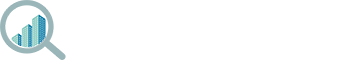
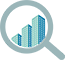
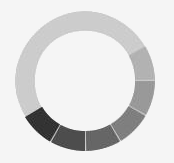

In [4]:
print(soup)

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="en" http-equiv="Content-Language"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="index, follow" name="robots"/>
  <meta content="all" name="robots"/>
  <meta content="all" name="googlebot"/>
  <meta msnbot="all" name="msnbot"/>
  <meta content="YES" name="apple-mobile-web-app-capable"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="anonymous" href="//pics3.city-data.com/fonts/glyphicons-halflings-regular.woff2" rel="preload" type="font/woff2"/>
  <link as="script" crossorigin="anonymous" href="//ajax.googleapis.com/ajax/libs/jquery/1.12.4/jquery.min.js" rel="preload"/>
  <link as="script" crossorigin="anonymous" href="//maxcdn.bootstrapcdn.com/bootstrap/3.3.2/js/bootstrap.min.js" rel="preload"/>
  <link as="script" href="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js" rel="preload"/>
  <link as="script" href=
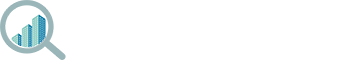
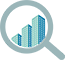
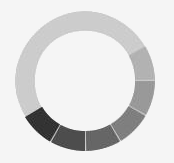

In [5]:
print(soup.prettify())

In [6]:
column_names = ['Street','Length','Direction','Address Min','Address Max']
df = pd.DataFrame(columns = column_names)
df

,Street,Length,Direction,Address Min,Address Max


In [7]:
df.reindex(df.index.tolist() + list(range(0, 69)))

,Street,Length,Direction,Address Min,Address Max
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN


In [8]:
dollar_tree_list = soup.find_all(class_ = 'col-xs-12 col-sm-6 col-md-4')
for i in dollar_tree_list[:2]:
    print("")
    print(i)


<div class="col-xs-12 col-sm-6 col-md-4"><div class="panel panel-default panel-tile"><div class="panel-heading"><h4 class="panel-title">State Hwy 9a (Henry Hudson Pkwy)
</h4></div><div class="panel-body"><b>Length:</b> 1.11 miles<br/>
<b>Directions:</b> N-S, SW-NE
</div></div></div>

<div class="col-xs-12 col-sm-6 col-md-4"><div class="panel panel-default panel-tile"><div class="panel-heading"><h4 class="panel-title">Riverside Dr
</h4></div><div class="panel-body"><b>Length:</b> 3.21 miles<br/>
<b>Directions:</b> E-W, N-S, SW-NE
</div></div></div>


In [9]:
for i in dollar_tree_list[67:]:
    print("")
    print(i)


<div class="col-xs-12 col-sm-6 col-md-4"><div class="panel panel-default panel-tile"><div class="panel-heading"><h4 class="panel-title">W 70th St
</h4></div><div class="panel-body"><b>Length:</b> 0.02 miles<br/>
<b>Direction:</b> SE-NW
</div></div></div>

<div class="col-xs-12 col-sm-6 col-md-4"><div class="panel panel-default panel-tile"><div class="panel-heading"><h4 class="panel-title">Metro North Commuter RR (Amtrak RR)
</h4></div><div class="panel-body"><b>Length:</b> 0.69 miles<br/>
<b>Directions:</b> N-S, SE-NW, SW-NE
</div></div></div>


In [10]:
type(dollar_tree_list)
len(dollar_tree_list)

69

In [11]:
i = 0
for table in dollar_tree_list[:]:
    street = table.contents[0].contents[0].contents[0].contents[0]
    #print(street)
    street = street.replace('\r\n', '')
    df.loc[i, 'Street'] = street
    i+=1
df    

,Street,Length,Direction,Address Min,Address Max
0,State Hwy 9a (Henry Hudson Pkwy),NaN,NaN,NaN,NaN
1,Riverside Dr,NaN,NaN,NaN,NaN
2,Columbus Ave,NaN,NaN,NaN,NaN
3,Amsterdam Ave,NaN,NaN,NaN,NaN
4,Central Park W,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64,Pomander Walk,NaN,NaN,NaN,NaN
65,E Tower Dr,NaN,NaN,NaN,NaN
66,W 63rd St,NaN,NaN,NaN,NaN
67,W 70th St,NaN,NaN,NaN,NaN


In [12]:
i = 0
for table in dollar_tree_list[:]:
    miles = (table.contents[0].contents[1].contents[1])
    miles = miles.replace(' miles', '')
    miles = miles.strip()
    miles = float(miles)
    df.loc[i, 'Length'] = miles
    i+=1
df    

,Street,Length,Direction,Address Min,Address Max
0,State Hwy 9a (Henry Hudson Pkwy),1.11,NaN,NaN,NaN
1,Riverside Dr,3.21,NaN,NaN,NaN
2,Columbus Ave,2.73,NaN,NaN,NaN
3,Amsterdam Ave,2.73,NaN,NaN,NaN
4,Central Park W,2.72,NaN,NaN,NaN
...,...,...,...,...,...
64,Pomander Walk,0.05,NaN,NaN,NaN
65,E Tower Dr,0.05,NaN,NaN,NaN
66,W 63rd St,0.04,NaN,NaN,NaN
67,W 70th St,0.02,NaN,NaN,NaN


In [13]:
df = df.rename(columns={'Length': 'Miles'})

In [14]:
i = 0
for table in dollar_tree_list[:]:
    string = (table.contents[0].contents[1].contents[5])
    string = string.replace('\r\n', '')
    string = string.strip()
    df.loc[i, 'Direction'] = string
    i+=1
df 

,Street,Miles,Direction,Address Min,Address Max
0,State Hwy 9a (Henry Hudson Pkwy),1.11,"N-S, SW-NE",NaN,NaN
1,Riverside Dr,3.21,"E-W, N-S, SW-NE",NaN,NaN
2,Columbus Ave,2.73,SW-NE,NaN,NaN
3,Amsterdam Ave,2.73,SW-NE,NaN,NaN
4,Central Park W,2.72,SW-NE,NaN,NaN
...,...,...,...,...,...
64,Pomander Walk,0.05,SW-NE,NaN,NaN
65,E Tower Dr,0.05,SW-NE,NaN,NaN
66,W 63rd St,0.04,SE-NW,NaN,NaN
67,W 70th St,0.02,SE-NW,NaN,NaN


In [15]:
i = 0
for table in dollar_tree_list[:]:
    if 'Address range' in (str(table.contents[0].contents[1])):
        string = table.contents[0].contents[1].contents[8]
        string = string.strip()
        integer = int(string)
        df.loc[i, 'Address Min'] = integer
    i+=1
df 

,Street,Miles,Direction,Address Min,Address Max
0,State Hwy 9a (Henry Hudson Pkwy),1.11,"N-S, SW-NE",NaN,NaN
1,Riverside Dr,3.21,"E-W, N-S, SW-NE",NaN,NaN
2,Columbus Ave,2.73,SW-NE,1,NaN
3,Amsterdam Ave,2.73,SW-NE,1,NaN
4,Central Park W,2.72,SW-NE,1,NaN
...,...,...,...,...,...
64,Pomander Walk,0.05,SW-NE,1,NaN
65,E Tower Dr,0.05,SW-NE,NaN,NaN
66,W 63rd St,0.04,SE-NW,NaN,NaN
67,W 70th St,0.02,SE-NW,NaN,NaN


In [16]:
i = 0
for table in dollar_tree_list[:]:
    if 'Address range' in (str(table.contents[0].contents[1])):
        string = table.contents[0].contents[1].contents[10]
        string = string.replace('\r\n', '')
        string = string.strip()
        integer = int(string)
        df.loc[i, 'Address Max'] = integer
    i+=1
df 

,Street,Miles,Direction,Address Min,Address Max
0,State Hwy 9a (Henry Hudson Pkwy),1.11,"N-S, SW-NE",NaN,NaN
1,Riverside Dr,3.21,"E-W, N-S, SW-NE",NaN,NaN
2,Columbus Ave,2.73,SW-NE,1,997
3,Amsterdam Ave,2.73,SW-NE,1,999
4,Central Park W,2.72,SW-NE,1,498
...,...,...,...,...,...
64,Pomander Walk,0.05,SW-NE,1,24
65,E Tower Dr,0.05,SW-NE,NaN,NaN
66,W 63rd St,0.04,SE-NW,NaN,NaN
67,W 70th St,0.02,SE-NW,NaN,NaN


In [17]:
df.to_excel(('/Users/Isaac/Desktop/UWS.xlsx'))

In [20]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [21]:
df.head(70)

,Street,Miles,Direction,Address Min,Address Max
0,State Hwy 9a (Henry Hudson Pkwy),1.11,"N-S, SW-NE",NaN,NaN
1,Riverside Dr,3.21,"E-W, N-S, SW-NE",NaN,NaN
2,Columbus Ave,2.73,SW-NE,1,997
3,Amsterdam Ave,2.73,SW-NE,1,999
4,Central Park W,2.72,SW-NE,1,498
5,Broadway,2.71,"N-S, SW-NE",1835,2799
6,W End Ave,2.67,SW-NE,1,999
7,W 72nd St (W 72 St),0.84,"E-W, SE-NW",2,399
8,W 71 St,0.83,"E-W, SE-NW",1,399
9,W 70th St (W 70 St),0.83,"E-W, SE-NW",1,499
